In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
w = np.array([2,3])
v = np.array([4,0])

# compute w-parallel-to-v
beta = np.dot(v,w) / (np.dot(v,v))
w_par_v = beta*v

# compute w-orthgonal-to-v
w_perp_v = w - w_par_v

# confirm results algebraically 
print((w_par_v + w_perp_v) - w)
print(np.dot(w_par_v,w_perp_v))

[0. 0.]
0.0


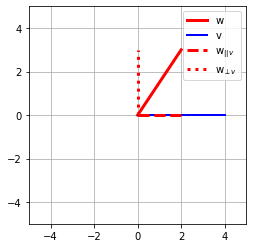

In [8]:
plt.plot([0,w[0]],[0,w[1]],'r',linewidth=3)
plt.plot([0,v[0]],[0,v[1]],'b',linewidth=2)
plt.plot([0,w_par_v[0]],[0,w_par_v[1]],'r--',linewidth=3)
plt.plot([0,w_perp_v[0]],[0,w_perp_v[1]],'r:',linewidth=3)

plt.legend(['w','v','w$_{||v}$','w$_{\perp v}$'])
plt.axis('square')
plt.grid()
plt.axis([-5,5,-5,5])
plt.show()

## 122.Gram-Schmidt algorithm

In [12]:
m = n = 4
A = np.random.randn(m,n)
Q = np.zeros((m,n))

#loop over columns
for i in range(n):
    Q[:,i] = A[:,i]
    a = A[:,i]
    
    for j in range(i):
        q = Q[:,j]
        Q[:,i] = Q[:,i] - np.dot(a,q) / np.dot(q,q) * q

    Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])

[[ 1.  0. -0. -0.]
 [ 0.  1.  0. -0.]
 [-0.  0.  1.  0.]
 [-0. -0.  0.  1.]]


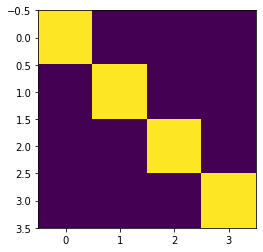

In [24]:
print(np.round(Q.T@Q,3))
plt.imshow(Q.T@Q)
plt.show()

In [25]:
Q2,R = np.linalg.qr(A,'complete')
print(np.round(Q,3)),print(' ')
print(np.round(Q2,3))

[[-0.662  0.143 -0.623  0.391]
 [-0.234 -0.202  0.642  0.702]
 [-0.712 -0.088  0.363 -0.595]
 [-0.016  0.965  0.26   0.035]]
 
[[-0.662  0.143  0.623  0.391]
 [-0.234 -0.202 -0.642  0.702]
 [-0.712 -0.088 -0.363 -0.595]
 [-0.016  0.965 -0.26   0.035]]


# inverse via QR

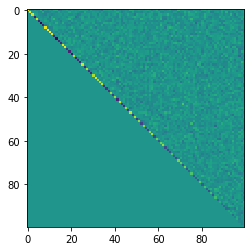

In [27]:
x = 100
O = np.random.randn(x,x)

#explicit inverse
Oi = np.linalg.inv(O)

#inverse via QR
Q,R = np.linalg.qr(O)
plt.imshow(R)
plt.show()

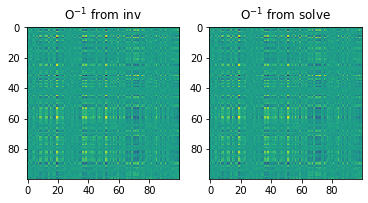

In [30]:
OiQR1 = np.linalg.inv(R)@Q.T
OiQR2 = np.linalg.solve(R,Q.T) #difference from MATLAB \

plt.subplot(1,2,1)
plt.imshow(OiQR1)
plt.title('O$^{-1}$ from inv')

plt.subplot(1,2,2)
plt.imshow(OiQR2)
plt.title('O$^{-1}$ from solve')

plt.show()

In [32]:
np.corrcoef((OiQR1.flatten(), OiQR2.flatten(),Oi.flatten()))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [33]:
E = np.array([[1,2],[3,4]])
print(E.flatten())

[1 2 3 4]
